# Проект №12: Исследование предпочтений пользователей в авиаперевозках

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# Import libraries and set the initial settings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as p
import matplotlib.pyplot as plt
from IPython.display import display
sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Analytics (Аналитика)

In [2]:
#query_1 = pd.read_csv('airlines_project/query_1.csv')
#query_3 = pd.read_csv('airlines_project/query_3.csv')
#query_last = pd.read_csv('airlines_project/query_last.csv')
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')
query_last = pd.read_csv('/datasets/query_last.csv')


print('//////////////////////')
print(query_1.info())
print('//////////////////////')
print(query_3.info())
print('//////////////////////')
print(query_last.info())

//////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
//////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
//////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes
None


In [3]:
display(query_1.head(8))
display(query_3.head())
display(query_last.head(10))

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Задачи к перому и третьему запросу:
- [x]  импортировать файлы;
- [x]  изучить данные в них;
- [x]  проверить типы данных на корректность;
- [x]  выбрать топ-10 городов по количеству рейсов;
- [x]  построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- [x]  сделать выводы по каждому из графиков, пояснить результат.

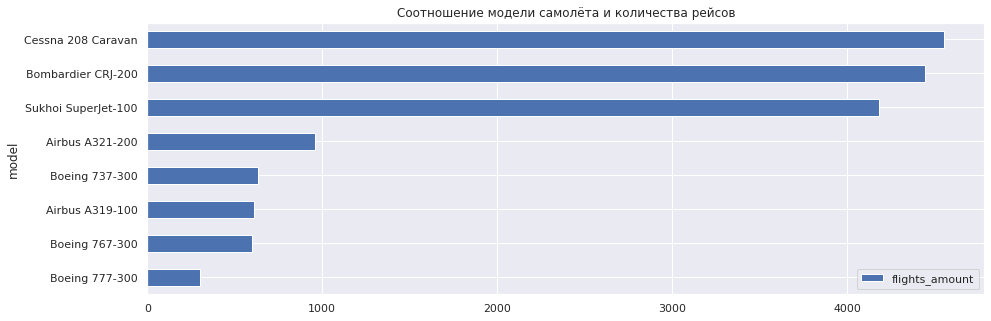

In [4]:
#модели самолётов и количество рейсов
pic_top_model_aircraft = (query_1
                            .set_index('model')
                            .sort_values(by='flights_amount', ascending=True)
                            .plot(kind='barh', figsize=(15,5), title= 'Соотношение модели самолёта и количества рейсов')
                           );

In [5]:
query_1.loc[4:,'flights_amount'].mean()/query_1.loc[:4,'flights_amount'].mean()

5.443978043267679

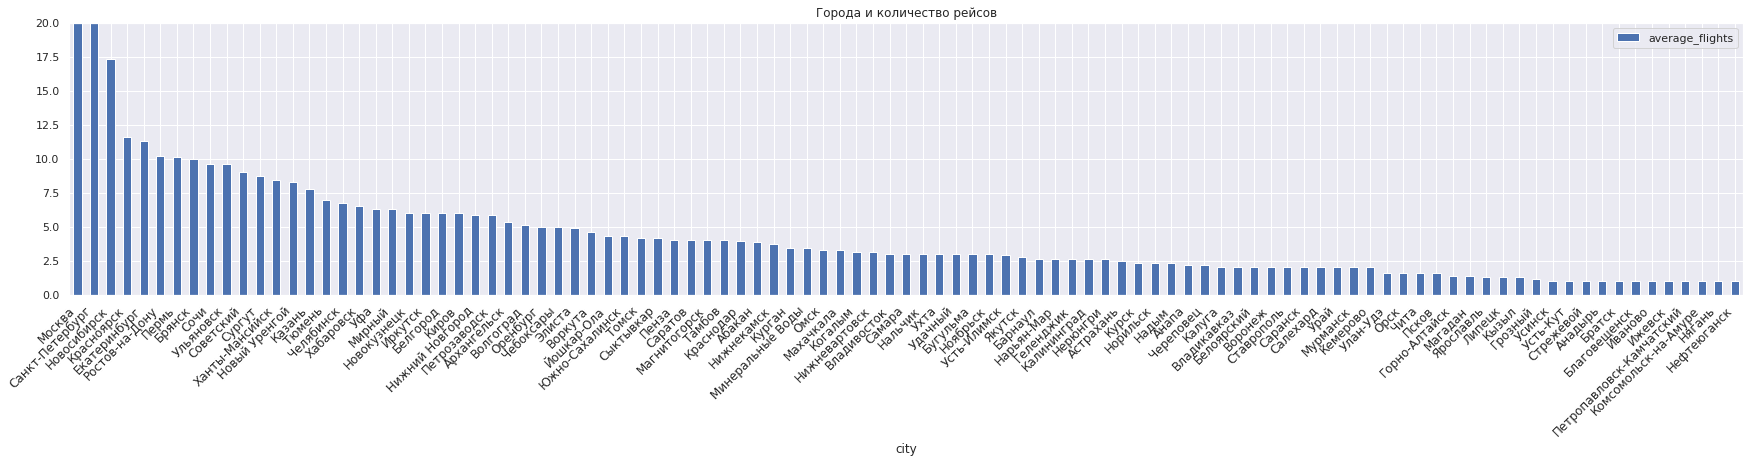

In [6]:
pic_top_city = (query_3
                 .sort_values(by='average_flights', ascending=False)
                 .set_index('city')
                 .plot(kind='bar',figsize=(30,5), ylim=(0,20), title='Города и количество рейсов')
                );
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
);

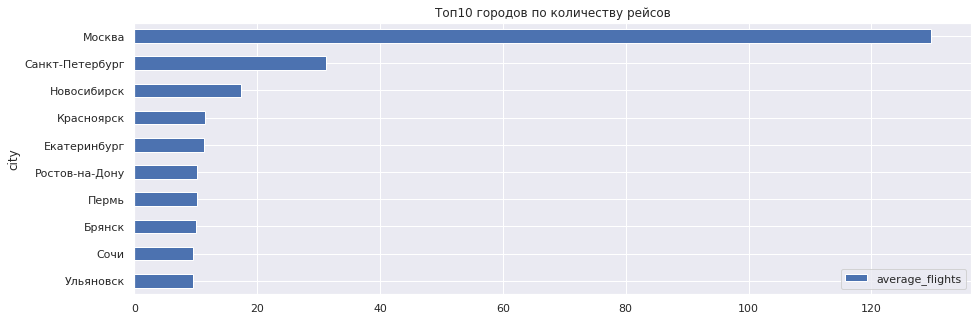

In [7]:
#Топ 10 городов по количеству рейсов
pic_top_city = (query_3
                 .sort_values(by='average_flights', ascending=False)
                 .head(10).set_index('city')
                 .sort_values(by='average_flights',ascending=True)
                 .plot(kind='barh',figsize=(15,5), title='Топ10 городов по количеству рейсов')
                );

## Вывод

В данном проекте не хватает возможности напрямую из проекта подключиться к pyspark и вытянуть дополнительные аналитики,
т.к. срезы полученные в виде csv не обладают всей информацией.

1. Срез данных за август(1 месяц) показал, что модели самолетов: *Cessna 208 Caravan*, *Bombardier CRJ-200*, *Sukhoi SuperJet-100* - в 5.4 раза чаще летали по сравнению с другими фирмами производителями, такими как Boeing и Airbus.  Стоит отметить, что *Cessna 208 Caravan* является лидером по перелетам, но это однотурбинный самолет расчитанный на небольшие расстояния, возможно используется в областях для сообщения с населенными пунктами, где не рентабельно использовать более крупные самолеты. Также эти самолеты(*Cessna 208 Caravan*, *Bombardier CRJ-200*, *Sukhoi SuperJet-100*) являются более дешёвыми версиями как по стоимости, так и по содержанию. Был следан дополнительный запрос SQL(приложение №6), что позволило проверить гипотезу, о том что *Cessna 208 Caravan* используется для сообщения в регионах, а так как Москва превосходит по населению в разы остальные административные центры, а тем более города, то можно сделать метрику количество вылетов на единицу населения, и можно будет увидеть, что в регионах наиболее частоиспользуются данные модели, особенно *Cessna 208 Caravan*.  *Bombardier CRJ-200*, *Sukhoi SuperJet-100* - данные модели предположительно используются для полетов в эконом классе и связи на более дание расстояния по сравнению с *Cessna 208 Caravan*.

2. Количество рейсов вероятнее всего соответствует количеству жителей в городе, что ярко заметног на втором графике по соотношению городов и чреднему количеству полетов в неделю. Москва - столица, и самый крупный город, что соответствует самому большому количеству вылетов самолетов. После топ трёх городов: Москвы, Санкт-Петербурга и Новосибирска идут другие города милионики. 


В дополнение к текущим заданиям, я бы дополнительно исследовал города и топ самолетов для каждого города, сезональные активности, корреляцию между численностью и количеством полетов, модели и вместительность самолетов - пасажиропоток. 

# 2. Hypothesis testing (Проверка гипотезы)

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

In [8]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Воспользуемся параметричискими и непараметрическими тестами. Различие которых в типе распределения исходной выборки

**Compare Sample Means (parametric)**
* Student’s t-test
* Paired Student’s t-test
* Analysis of Variance Test (ANOVA)
* Repeated Measures ANOVA Test


**Compare Sample Means (nonparametric)**
* Mann-Whitney U Test
* Wilcoxon Signed-Rank Test
* Kruskal-Wallis H Test
* Friedman Test

In [9]:
# Проведём проверку на нормальность для последующего применения тестов
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro

data = query_last.ticket_amount
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.433, p=0.000
Probably not Gaussian


In [10]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
#data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=28.127, p=0.000
Probably not Gaussian


/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



In [11]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
#data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=2.705
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


Гипотеза о том что выборка распределена нормальна  отклоненна, но в случае с данной выборкой, когда количество элементов всего три, невозможно судить о нормальности распределения по этим данным. Вследствии, чего рассмотрим и результат параметрических и непараметрических тестов.

In [12]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


### Parametric Statistical Hypothesis Tests

In [13]:
data1 = query_last.loc[[0,1,6],'ticket_amount'] #проходили фестивали
data2 = query_last.loc[[2,3,4,5,7,8,9],'ticket_amount'] # НЕ БыЛО ФЕСТИВАЛЕЙ

In [14]:
def func(stat, p, alpha):
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')


def stat_test(data1, data2 ,name_test = '', alpha=.05):
    '''
    Функция для тестирования статистических гипотез по средним значениям.
    Если требуется получить требуемые наименования тестов для расчёта, тогда запустите функцию без аргуметов.
    '''
    from IPython.display import display
    info = pd.DataFrame({'name' : ['Student’s t-test',\
                                   'Paired Student’s t-test',\
                                   'Analysis of Variance Test (ANOVA)',\
                                   'Repeated Measures ANOVA Test',\
                                   'Mann-Whitney U Test',\
                                   'Wilcoxon Signed-Rank Test',\
                                   'Kruskal-Wallis H Test',\
                                   'Friedman Test'],\
              'type_test' : ['Parametric Statistical Hypothesis Tests',\
                             'Parametric Statistical Hypothesis Tests',\
                             'Parametric Statistical Hypothesis Tests',\
                             'Parametric Statistical Hypothesis Tests',\
                             'Nonparametric Statistical Hypothesis Tests',\
                             'Nonparametric Statistical Hypothesis Tests',\
                             'Nonparametric Statistical Hypothesis Tests',\
                             'Nonparametric Statistical Hypothesis Tests'\
                            ],\
              'name_for_func' : ['student_test',\
                                 'paired_student_test',\
                                 'anova',
                                 'anova_repit',
                                 'mann_whithey',
                                 'wilcoxon',
                                 'kruskal',
                                 'friedman'
                                ]
             })
            
    if name_test == 'student_test':
        from scipy.stats import ttest_ind
        stat, p = ttest_ind(data1, data2)
        return func(stat, p, alpha)
        
    elif name_test == 'paired_student_test':
        from scipy.stats import ttest_rel
        stat, p = ttest_rel(data1, data2)
        return func(stat, p, alpha)
    
    elif name_test == 'anova':
        from scipy.stats import f_oneway
        stat, p = f_oneway(data1, data2)
        return func(stat, p, alpha)
    
    elif name_test == 'anova_repit':
        pass
    
    elif name_test == 'mann_whithey':
        from scipy.stats import mannwhitneyu
        stat, p = mannwhitneyu(data1, data2)
        return func(stat, p, alpha)
    
    elif name_test == 'wilcoxon':
        from scipy.stats import wilcoxon
        stat, p = wilcoxon(data1, data2)
        return func(stat, p, alpha)
    
    elif name_test == 'kruskal':
        from scipy.stats import kruskal
        stat, p = kruskal(data1, data2)
        return func(stat, p, alpha)
    
    elif name_test == 'friedman':
        from scipy.stats import friedmanchisquare
        stat, p = friedmanchisquare(data1, data2, data3)
        return func(stat, p, alpha)
    else:
        display(info)
        


#### Student’s t-test
Tests whether the means of two independent samples are significantly different. 
*Проверяет, существенно ли отличаются средние значения двух независимых выборок.*

Assumptions *(Аксиомы теста)*

* Observations in each sample are independent and identically distributed (iid). *(Наблюдения в каждой выборке независимы и одинаково распределены (iid))*
* Observations in each sample are normally distributed. *(Наблюдения в каждой выборке распределены нормально)*
* Observations in each sample have the same variance. *(Наблюдения в каждой выборке имеют одинаковую дисперсию)*

Interpretation *(Гипотезы)*

* H0: the means of the samples are equal. *(Нулевая гипотеза: средние значения выборок равны)*
* H1: the means of the samples are unequal. *(Альтернатиная гипотеза: средние значения выборок **НЕ** равны)*

In [15]:
stat_test(data1,data2,'student_test')

stat=-1.880, p=0.097
Probably the same distribution


### Paired Student’s t-test
Tests whether the means of two paired samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are paired. *(Наблюдения по каждой выборке парные)*

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [16]:
data1_paired = query_last.loc[[0,1,6],'ticket_amount']
data2_paired = query_last.loc[[2,3,7],'ticket_amount']
data1_paired

0    43568
1    51034
6    51386
Name: ticket_amount, dtype: int64

In [17]:
stat_test(data1_paired,data2_paired,'paired_student_test')

stat=-1.121, p=0.379
Probably the same distribution


### Conclusion

This method is not suitable because it is for dependent samples.

### Analysis of Variance Test (ANOVA)
Tests whether the means of two or more independent samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation
* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.

In [18]:
stat_test(data1, data2, 'anova')

stat=3.535, p=0.097
Probably the same distribution


Согласно, парметрическим тестам, распределения верояно одинаковые, т.е. нулевая гипотеза не отвергается, а альтернативная наоборот отвергается. НО ни одна из аксиом по распределению не соответствует действительности, т.к. мы не можем это проверить, из-за недостатка данных, по тем данным чтое сть в та

## Nonparametric Statistical Hypothesis Tests

### Mann-Whitney U Test
Tests whether the distributions of two independent samples are equal or not.
*Проверяем, равны ли распределения двух независимых выборок или нет.*

Assumptions

* Observations in each sample are independent and identically distributed (iid). *(Наблюдения в каждой выборке независимы и одинаково распределены (iid))*
* Observations in each sample can be ranked. *(Наблюдения в каждой выборке могут быть ранжированы)*

Interpretation

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

In [19]:
stat_test(data1,data2,'mann_whithey')

stat=2.000, p=0.034
Probably different distributions


### Wilcoxon Signed-Rank Test
Tests whether the distributions of two paired samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

Interpretation

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

In [20]:
stat_test(data1_paired,data2_paired,'wilcoxon')

stat=0.000, p=0.109
Probably the same distribution


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning:

Sample size too small for normal approximation.



### Conclusion

This method is not suitable because it is for dependent samples.

### Kruskal-Wallis H Test

Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

* H0: the distributions of all samples are equal.
* H1: the distributions of one or more samples are not equal.

In [21]:
stat_test(data1,data2,'kruskal')

stat=3.753, p=0.053
Probably the same distribution


### Friedman Test
#### Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

Interpretation

* H0: the distributions of all samples are equal.
* H1: the distributions of one or more samples are not equal.

In [22]:
#stat_test(data1_paired,data2_paired,'friedman')

## Вывод
Непараметрические статичтические тесты дали противоречивые результаты, например тест Крускала-Уоллиса говорит что распределения разнятся,а Манна-Уитни наоборот. Как я понимаю более достоверным является критерий Манна-Уитни, поэтому Изначальная нулевая гипотеза *«Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».* отвергнута, что значит принятие альернативной гипотезы - средний спрос на билеты разница между обычным временем и когда проходят фестивали.

# Итог
Хочу пострараться получить максимум из данного проекта, но подключиться к pyspark в данном проекте не получится, что не позволяет сделать более глуюокую аналитику. Графики построенны и полученны зависимоти топ городов от количества рейсов, а также зависимость моделей самолетов от рейсов. Во второй части работы взаимодействовал со статистическимаи гипотезами, рассмотрел параметрические и непараметрические, нашёл противоречие в результатах, принял за иситину результат гиотезы по критерию Манны-Уитни. 

# Приложение к проекту

## Описание данных
В вашем распоряжении база данных об авиаперевозках.
1. Таблица **airports** — *информация об аэропортах*:
    * airport_code — трёхбуквенный код аэропорта
    * airport_name — название аэропорта
    * city — город
    * timezone — временная зона
    
    
2. Таблица **aircrafts** — *информация о самолётах*:
    * aircraft_code — код модели самолёта
    * model — модель самолёта
    * range — дальность полёта
    
    
3. Таблица **tickets** — и*нформация о билетах*:
    * ticket_no — уникальный номер билета
    * passenger_id — персональный идентификатор пассажира
    * passenger_name — имя и фамилия пассажира
    
    
4. Таблица **flights** — *информация о рейсах*:
    * flight_id — уникальный идентификатор рейса
    * departure_airport — аэропорт вылета
    * departure_time — дата и время вылета
    * arrival_airport — аэропорт прилёта
    * arrival_time — дата и время прилёта
    * aircraft_code — id самолёта
    
    
5. Таблица **ticket_flights** — *стыковая таблица «рейсы-билеты»*
    * ticket_no — номер билета
    * flight_id — идентификатор рейса
    
    
6. Таблица **festivals** — *информация о фестивалях*
    * festival_id — уникальный номер фестиваля
    * festival_date — дата проведения фестиваля
    * festival_city — город проведения фестиваля
    * festival_name — название фестиваля

## ER diagram

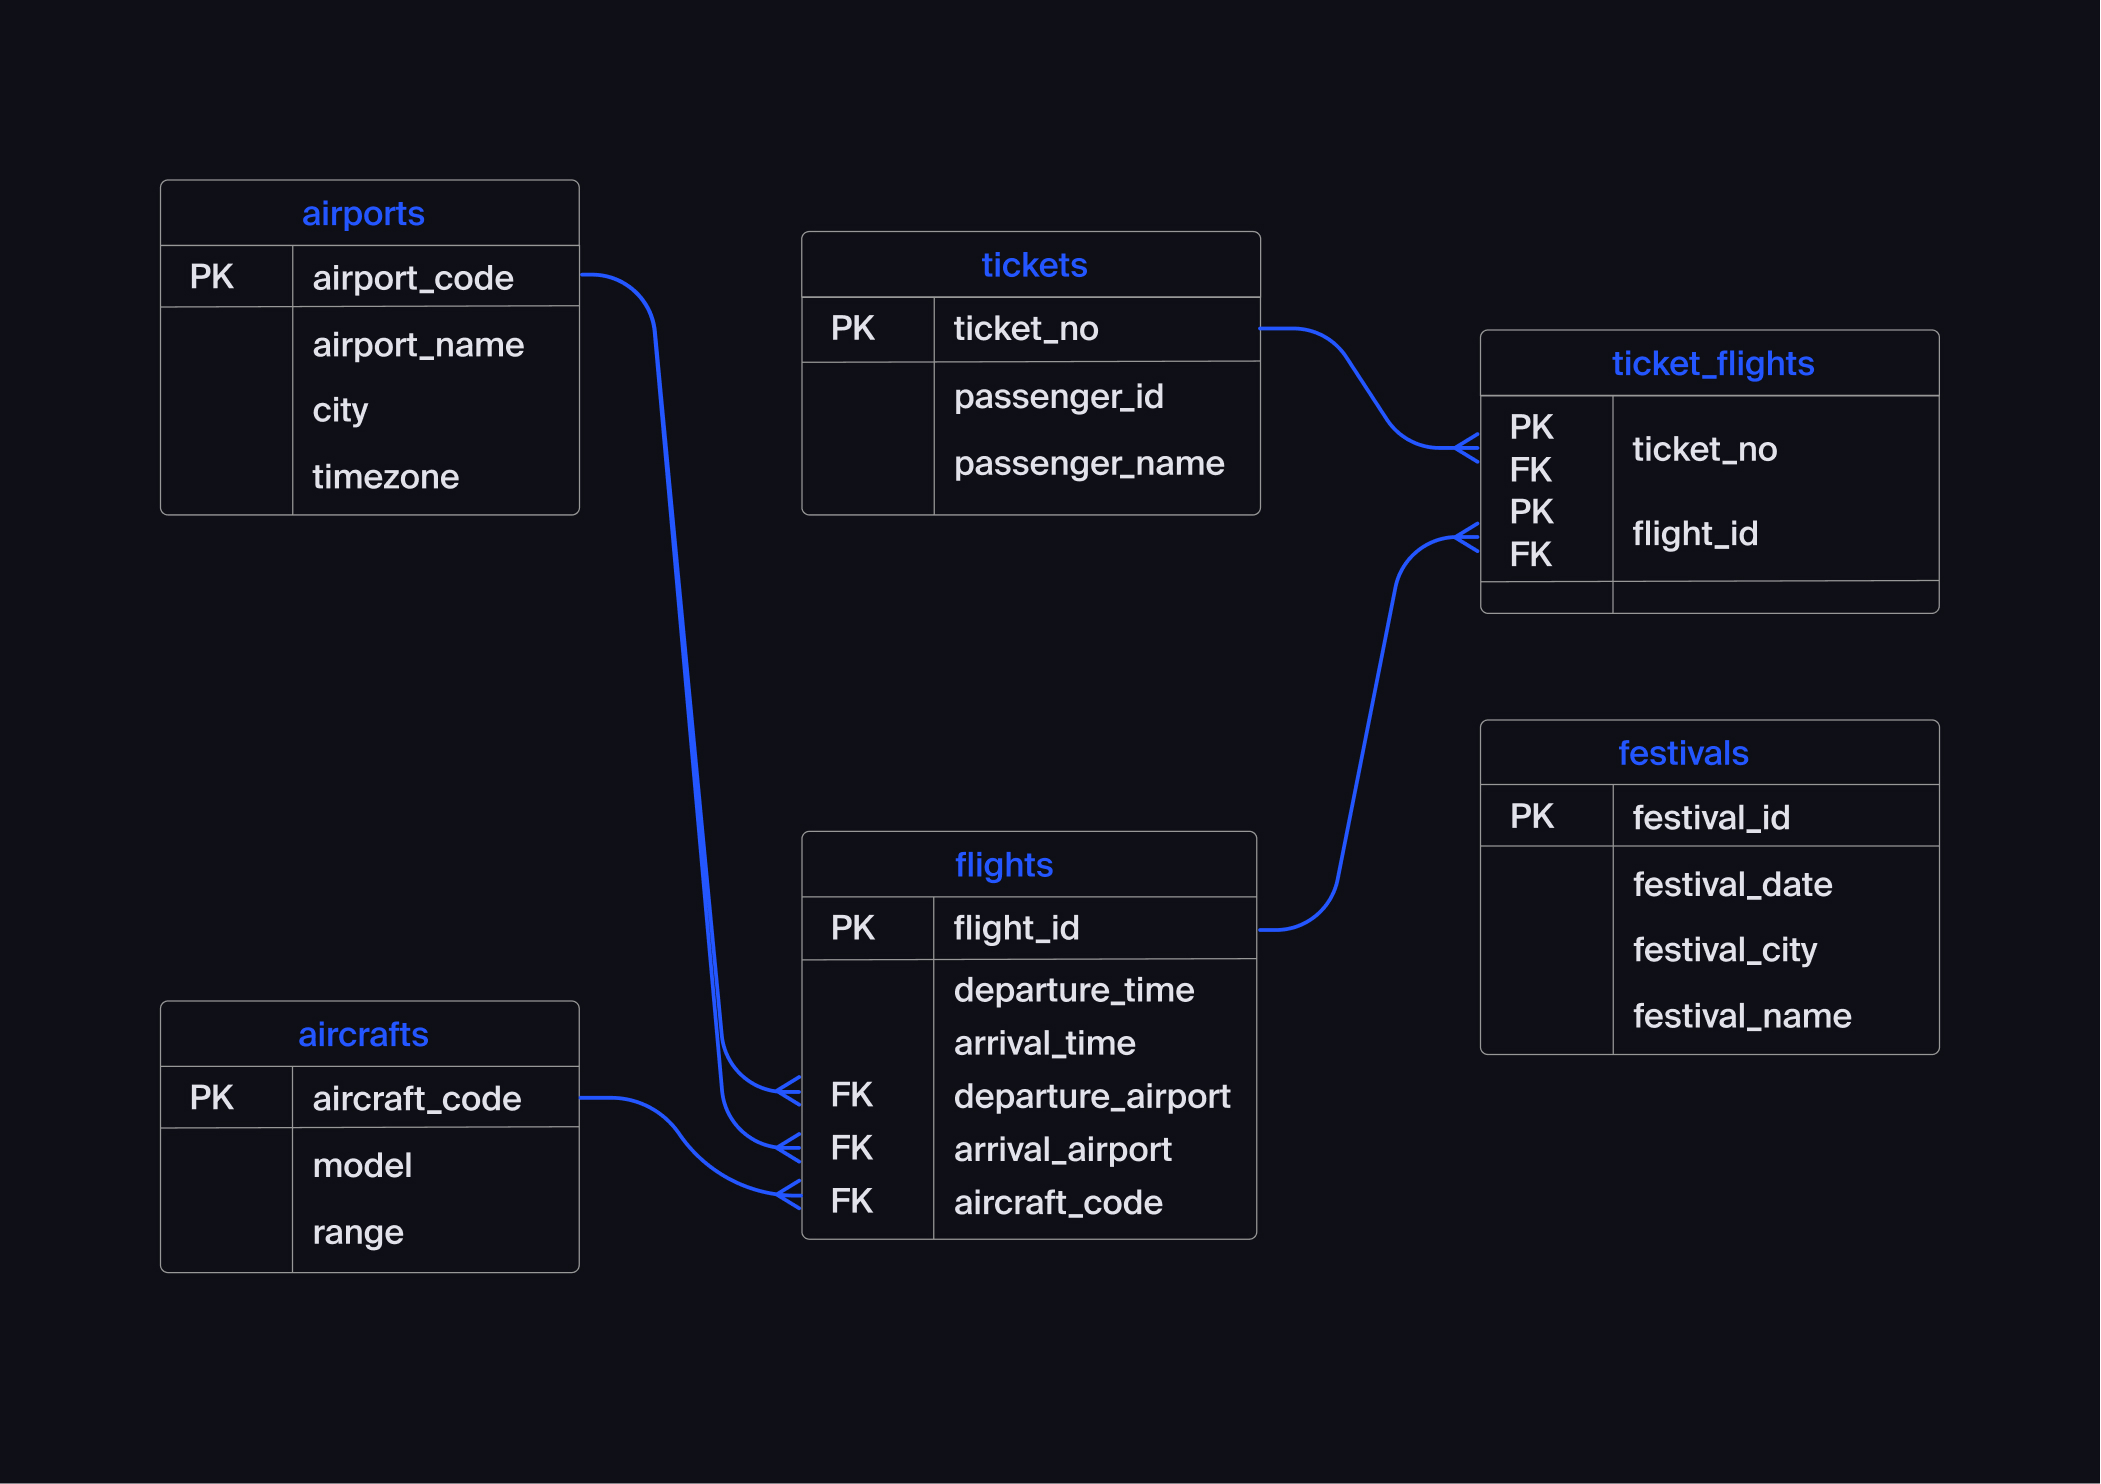

## Запросы к БД

1. Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его. Также напечатайте на экране поле model. Столбцы в таблице должны быть выведены в следующем порядке:
    * model
    * flights_amount

---
### Query 1
~~~~
SELECT
    aircrafts.model AS model,
    COUNT(flights.flight_id) AS flights_amount
FROM flights 
    INNER JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE
    flights.departure_time::date BETWEEN '2018-09-01' AND '2018-09-30'
GROUP BY
    model
~~~~

2. Посчитайте количество отправленных рейсов по всем моделям самолётов Boeing и Airbus в сентябре. Назовите получившуюся переменную flights_amount и выведите её.

---
### Query 2
~~~~
SELECT
    SUM(tables.flights_amount) AS flights_amount
FROM
    (SELECT
        COUNT(flights.flight_id) AS flights_amount
    FROM
        flights
        INNER JOIN aircrafts ON 
        aircrafts.aircraft_code = flights.aircraft_code
    WHERE
        (model LIKE '%Boeing%' OR model LIKE '%Airbus%') AND
        EXTRACT(MONTH FROM flights.departure_time::date) = 9 AND
        EXTRACT(YEAR FROM flights.departure_time::date) = 2018) AS tables
~~~~

3. Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.

---
### Query 3
~~~~
SELECT
    CITY,
    AVG(COUNTS) AS average_flights
FROM
    (SELECT DISTINCT
        COUNT(*) AS counts,
        EXTRACT(DAY FROM ARRIVAL_TIME) as day,
        CITY
    FROM 
        flights INNER JOIN airports ON 
        airports.airport_code = flights.arrival_airport
    WHERE EXTRACT(MONTH FROM ARRIVAL_TIME)=8 AND EXTRACT(YEAR FROM ARRIVAL_TIME)=2018    
    GROUP BY
        day, CITY
    ORDER BY
        CITY) AS temp
GROUP BY CITY
~~~~

4. Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.

---
### Query 4
~~~~
SELECT
    FESTIVAL_NAME AS festival_name ,
    EXTRACT(WEEK FROM FESTIVAL_DATE::DATE) AS festival_week     
FROM 
    festivals 
WHERE 
    (FESTIVAL_DATE::DATE BETWEEN '2018-07-23' AND '2018-09-30') AND FESTIVAL_CITY = 'Москва' 
~~~~

5. Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество приобретённых билетов в Москву. Номер недели назовите week_number, количество билетов — ticket_amount. Вставьте результат в первую часть составного запроса в прекоде. Запрос должен соединится с запросом из предыдущей задачи оператором LEFT JOIN. Он работает так же, как и INNER JOIN. Но в ячейках с неделями, в которые фестивали не проходили, будут значения nan.

    Предпологаемый результат по столбцам:
    * week_number — номер недели из вашего запроса;
    * ticket_amount — количество купленных за неделю билетов;
    * festival_week — номер недели из предыдущего запроса. Будет равен nan, если фестиваля в эту неделю не было.
    * festival_name — название фестиваля. Будет равен nan, если фестиваля в эту неделю не было.

---
### Query 5
~~~~
SELECT 
	T.week_number,
	T.ticket_amount,
	T.festival_week,
	T.festival_name
FROM 
(
(  
    SELECT
        EXTRACT(WEEK FROM departure_time::date) AS week_number,
        COUNT(tickets.FLIGHT_ID) AS ticket_amount
    FROM flights 
        INNER JOIN (SELECT flight_id, ticket_no FROM ticket_flights)  AS tickets ON
        tickets.flight_id = flights.flight_id
    WHERE (departure_time::date BETWEEN '2018-07-23' AND '2018-09-30') AND ARRIVAL_AIRPORT IN (SELECT airport_code FROM airports WHERE city='Москва')
    GROUP BY week_number
) t
LEFT JOIN 
(SELECT 		
		festival_name,	
		EXTRACT (week FROM festivals.festival_date) AS festival_week
	FROM 
		festivals
	WHERE
		festival_city = 'Москва'
	  AND CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30'
) t2 
ON 
	t.week_number = t2.festival_week
) AS T;
~~~~

### Query 6
Дополнительный запрос
~~~~
SELECT
T.model,
airports.city,
SUM(T.flights_amount) AS sum_flights
FROM airports RIGHT JOIN 
(SELECT
    flights.arrival_airport AS airport,
    aircrafts.model AS model,
    COUNT(flights.flight_id) AS flights_amount
FROM flights 
    INNER JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE
    flights.departure_time::date BETWEEN '2018-09-01' AND '2018-09-30'
GROUP BY
    airport, model) AS T
ON T.AIRPORT = airports.airport_code
WHERE MODEL = 'Cessna 208 Caravan'
GROUP BY model, city
ORDER BY sum_flights DESC
~~~~

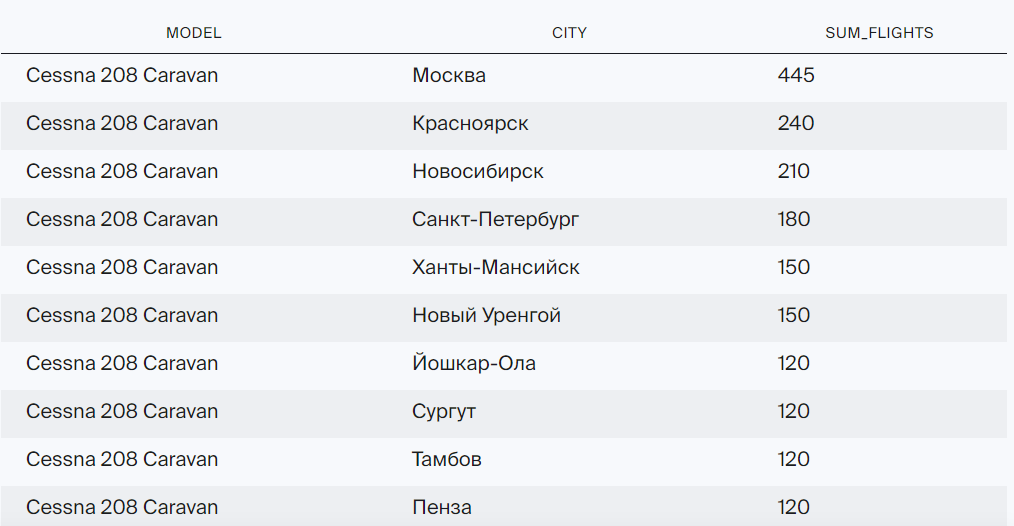

### Query 7
Седьмой запрос для получения топ3 моделей самолетов летавших вы августе с максимальной длительностью полета
~~~~
SELECT
    p.city,
    a.model,
    a.range,
    COUNT(flight_id) AS flights_count
FROM 
    flights AS f 
    LEFT JOIN aircrafts AS a ON a.aircraft_code = f.aircraft_code
    LEFT JOIN airports AS p ON p.airport_code = f.arrival_airport
WHERE
    EXTRACT(MONTH FROM f.DEPARTURE_TIME) = 9 AND
    EXTRACT(YEAR FROM f.DEPARTURE_TIME) = 2018 AND
    --p.city = 'Москва'
    --p.city = 'Новосибирск'
    p.city = 'Санкт-Петербург'
GROUP BY
    p.city,
    a.model,
    a.range
ORDER BY flights_count DESC
LIMIT 3
~~~~

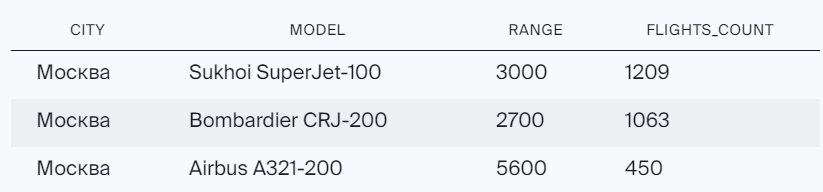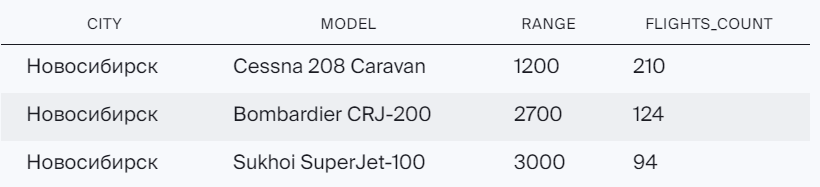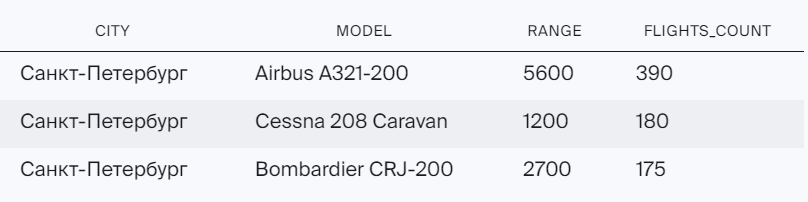